# New Section

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('DI.png')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])


In [3]:
# Step 1 [Converting color image to GrayScale]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [4]:
# Step 2 [noise removal]
kernel = np.ones((2,2),np.uint8)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)


In [5]:
# Step 3 [sure background area]
sure_bg = cv2.dilate(closing,kernel,iterations=3)

In [6]:
# Step 4 [Finding sure foreground area]
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)

In [7]:
# Step 5 [Threshold]
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)


In [8]:

# Step 6 [Finding unknown region]
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)


In [9]:
# Step 7 [Initializing Markers]
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [10]:
# Step 8 [Applying Water-Shed]
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]


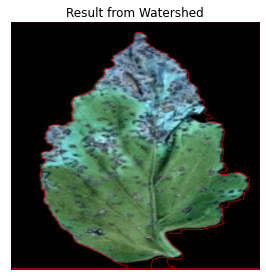

In [11]:
plt.imshow(img, 'gray')
cv2.imwrite('result1.jpeg',img)
plt.title("Result from Watershed"), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()